In [ ]:
#! pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import math as m

#------ HTML Libraries--------------
from IPython.display import display, display_html, HTML
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
pd.options.display.max_colwidth = 100

#-------Machine Learning Libraries------------
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from pandas import to_datetime
import datetime
from datetime import datetime
import warnings
import matplotlib as pt
import math

In [ ]:
colors = ['#FF0000', '#FA8072', '#00FF00', '#95c5b1', '#4169E1', '#adc3ff', '#595959', '#c4c4c4']

In [ ]:
# Modifying the scatter graph with multiple graphs at once as input
def visualize_scatter_graph(number_of_graphs: int, 
                df, 
                fill: str, 
                hovertemplate_name: list, 
                color_list: list, 
                title_head: str, 
                title_sub: str, 
                y_title: str):

    graph_data = []

    for graph_number in range(number_of_graphs):
        graph = go.Scatter(
                   hoverinfo='skip',
                   x=df.iloc[:, 0], 
                   y=df.iloc[:, graph_number + 1],
                   fill=fill, 
                   hovertemplate='<b>%{x}</b><br>' + f'<b>{hovertemplate_name[graph_number]}: </b>'+'%{y}<extra></extra>', 
                   marker_color=color_list[graph_number], 
                   name=hovertemplate_name[graph_number]
                    ) 
        graph_data.append(graph)
    
    fig = go.Figure(graph_data)


    fig.update_layout(
        title=f'{title_head}<br><sub>{title_sub}</sub>', 
        xaxis_title='', 
        yaxis_title=y_title, 
        plot_bgcolor='rgba(0,0,0,0)', 
        hovermode='x', 
        legend_orientation='h',
        font=dict(
            family='Arials',
            size=14, 
            color='black'
        )
    )

    fig.show()

In [ ]:
# Modifying the bar graph with multiple graphs at once as input
def visualize_bar_graph(number_of_graphs: int, 
            df, 
            hovertemplate_name: list, 
            color_list: list, 
            title_head: str, 
            title_sub: str, 
            x_title: str, 
            y_title: str, 
            barmode: str):
  

    graph_data = []
    
    for graph_number in range(number_of_graphs):
        graph = go.Bar(
                   hoverinfo='skip', 
                   x=df.iloc[:, 0],
                   y=df.iloc[:, graph_number + 1],
                   hovertemplate ='<b>%{x}</b><br>' + f'<b>{hovertemplate_name[graph_number]}: </b>'+'%{y} <extra></extra>', 
                   marker_color=color_list[graph_number],
                   name=hovertemplate_name[graph_number]
        ) 
        
        graph_data.append(graph)
    

    fig = go.Figure(graph_data)


    fig.update_layout(
        title=f'{title_head}<br><sub>{title_sub}</sub>', 
        xaxis_title=x_title, 
        yaxis_title=y_title, 
        plot_bgcolor='rgba(0,0,0,0)', 
        hovermode="x", 
        barmode=barmode, 
        bargap=0.15,
        font=dict(
            family='Arials', 
            size=14, 
            color='black'
        )
    )

    fig.show()

In [ ]:
# Counting rows and columns from a data frame 
def count_rows_and_columns(dfs: list, 
                              indexs: list):

    info_for_df = []
    strings = 0
    columns = 0
    

    for df in dfs:
        info_for_df.append({'Strings': df.shape[0], 'Columns': df.shape[1]})

    for df in dfs:
        strings += df.shape[0]
        columns += df.shape[1]
    
    info_for_df.append({'Strings': strings, 'Columns': columns})
    
    df = pd.DataFrame(info_for_df, index=indexs).T

    display(df.style\
              .set_caption('Number of records and attributes in dataframes')\
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#c4c4c4')]}]))

In [ ]:
# Checking the data types and highlighting them
def color_text(df): 
    
    if df in ['int64','int32']: 
        color = 'White'
        return f'Color: {color}'

def cell_fill(df): 

    if df == 'object': 
        color = '#DCDCDC'
    elif df in ['float64','float32']:
        color = '#C0C0C0'
    elif df in ['int64','int32']:
        color = '#696969'
    else: 
        color = '#A9A9A9'
    return f'background-color: {color}'

def data_type_visualization(dfs: list, titles: list):

    data_styler = []
    
    output = ''

    for i, name_df in enumerate(dfs):
        df_for_data = pd.DataFrame([dfs[i].dtypes], index=['Type']).T 
        df_styler = df_for_data.style\
                               .set_table_attributes("style='display:inline'")\
                               .set_caption(titles[i])\
                               .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#c4c4c4')]}])\
                               .background_gradient(cmap='Greys')\
                               .set_precision(2)\
                               .applymap(cell_fill)\
                               .applymap(color_text) 
        data_styler.append(df_styler)

    for i, block in enumerate(data_styler):
        output += data_styler[i]._repr_html_() + ' '
    
    display_html(output, raw=True) 

In [ ]:
# Counting missing values from the dataframes and title as input and provides the missing values at a particular row and column
def count_missing_values(dfs: list, titles: list):

    data_styler = []
    
    output = ''

    for i, name_df in enumerate(dfs):
        new_df = []
        for col in name_df.columns:
            pct_missing = name_df[col].isnull().mean()
            dic = {'Column name': col, '%': pct_missing}
            new_df.append(dic) 
             
        df_styler = pd.DataFrame(new_df).style\
                                        .set_table_attributes("style='display:inline'")\
                                        .set_caption(titles[i])\
                                        .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#c4c4c4')]}])\
                                        .background_gradient(cmap='Reds')\
                                        .set_precision(2)   
        data_styler.append(df_styler)

    for i, block in enumerate(data_styler):
        output += data_styler[i]._repr_html_() + ' '
        
    display_html(output, raw=True)

In [ ]:
#Checing dates format
def check_date(dfs: list, titles: list):

    list_with_dates = []
    
    output = ''
    
    for i in range(len(dfs)):
        dates_to_check = pd.concat([pd.DataFrame([dfs[i]['date'].unique()], index=['Date']).T\
                                      .astype('datetime64[ns]')
                                      .sort_values('Date')\
                                      .reset_index(),
                                    pd.DataFrame([pd.date_range(min(dfs[i]['date'].unique()), 
                                    periods=len(dfs[i]['date'].unique())).tolist()], index=['True date']).T\
                                      .sort_values('True date')],axis=1).drop('index', axis=1)
        
        dates_to_check['Check'] = dates_to_check['Date'] == dates_to_check['True date']

        df_styler = dates_to_check.T.style\
                                  .set_caption(titles[i])\
                                  .applymap(lambda v: 'background-color: #95c5b1' if v == True else '')\
                                  .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                                  .set_properties(**{'white-space': 'nowrap'})\
                                  .set_table_attributes("style='display:inline'")
        
        list_with_dates.append(df_styler)

    for i, block in enumerate(list_with_dates):
        output += list_with_dates[i]._repr_html_() + ' '

    display_html(output, raw=True)

In [ ]:
# importing necessary data sets
covid_summary = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\worldometer_coronavirus_summary_data.csv')
vaccination = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\country_vaccinations.csv')
covid_daily = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\worldometer_coronavirus_daily_data.csv')


data = [covid_summary, covid_daily, vaccination]

df_dates = [covid_daily, vaccination]

titles = ['Summary date numbers of daily Confirmed, Death and Active cases for 218 countries',
          'Daily Confirmed, Death and Active cases for 218 countries',
          'Data for daily and Total Vaccination for COVID-19 in the World']

data_for_display = []

for i, df in enumerate(data):
    #print(i, df)
    if i == 2:
        style_df = df.head().style\
                            .set_caption(titles[i])\
                            .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#fa9b28')]}])\
                            .set_properties(**{'white-space': 'nowrap'})\
                            .set_precision(2)
    else:
        style_df = df.head().style\
                            .set_caption(titles[i])\
                            .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#fa9b28')]}])\
                            .set_properties(**{'white-space': 'nowrap'})\
                            .set_precision(2)
        
    data_for_display.append(style_df) 
    

display(data_for_display[0], data_for_display[1], data_for_display[2])

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,56779,2512.00,51902.00,2365.00,1120.00,1434,63.00,356513.00,9005.00,39590542
1,Albania,Europe,126795,2274.00,94431.00,30090.00,18.00,44096,791.00,568441.00,197691.00,2875401
2,Algeria,Africa,117739,3108.00,81994.00,32637.00,16.00,2649,70.00,230861.00,5194.00,44450327
3,Andorra,Europe,12286,117.00,11523.00,646.00,12.00,158818,1512.00,193595.00,2502553.00,77359
4,Angola,Africa,22717,543.00,21452.00,722.00,13.00,675,16.00,429139.00,12759.00,33635465


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.00,nan,0.00,0.00,nan
1,2020-2-16,Afghanistan,0.00,nan,0.00,0.00,nan
2,2020-2-17,Afghanistan,0.00,nan,0.00,0.00,nan
3,2020-2-18,Afghanistan,0.00,nan,0.00,0.00,nan
4,2020-2-19,Afghanistan,0.00,nan,0.00,0.00,nan


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,0.00,0.00,nan,nan,nan,0.00,0.00,nan,nan,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
1,Afghanistan,AFG,2/23/2021,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
2,Afghanistan,AFG,2/24/2021,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
3,Afghanistan,AFG,2/25/2021,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
4,Afghanistan,AFG,2/26/2021,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm


In [ ]:
count_rows_and_columns([data[0], data[1], data[2]], 
                          ['Covid summary', 'Covid daily', 'Vaccination', 'Total'])


,Covid summary,Covid daily,Vaccination,Total
Strings,219,91128,9989,101336
Columns,12,7,15,34


In [ ]:
#data types of all the columns
data_type_visualization([data[2], data[0], data[1]], 
                        ['Vaccination data types', 'Covid summary data types', 'Covid daily data types'])

,Type
country,object
iso_code,object
date,object
total_vaccinations,float64
people_vaccinated,float64
people_fully_vaccinated,float64
daily_vaccinations_raw,float64
daily_vaccinations,float64
total_vaccinations_per_hundred,float64
people_vaccinated_per_hundred,float64


In [ ]:
data[2]['date'] = data[2]['date'].astype('datetime64')
data[1]['date'] = data[1]['date'].astype('datetime64')

data_type_visualization([data[2], data[0], data[1]], 
                        ['Vaccination data types', 'Covid summary data types', 'Covid daily data types'])

,Type
country,object
iso_code,object
date,datetime64[ns]
total_vaccinations,float64
people_vaccinated,float64
people_fully_vaccinated,float64
daily_vaccinations_raw,float64
daily_vaccinations,float64
total_vaccinations_per_hundred,float64
people_vaccinated_per_hundred,float64


In [ ]:
# Summary date numbers of daily Confirmed, Death and Active cases for 218 countries
data_for_display = []

for i, df in enumerate(data):
    # print("i = ", i, df)
    if i == 2:
        style_df = df.describe().style.set_caption(titles[i])\
                                .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#95c5b1')]}])\
                                .set_properties(**{'white-space': 'nowrap'})\
                                .applymap(lambda v: 'background-color: #fa9b98' if v < 0 else '')\
                                .set_precision(2)
    else:
        style_df = df.describe().style.set_caption(titles[i])\
                                .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#fa9b98')]}])\
                                .set_properties(**{'white-space': 'nowrap'})\
                                .applymap(lambda v: 'background-color: #fa9b98' if v < 0 else '')\
                                .set_precision(2)
        
    data_for_display.append(style_df)    
    

display(data_for_display[0], data_for_display[1], data_for_display[2])

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,219.00,203.00,217.00,217.00,144.00,219.00,199.00,209.00,209.00,219.00
mean,604743.53,14159.31,491922.53,95515.09,683.38,27991.00,508.62,9275681.10,536821.88,35692874.47
std,2539955.79,52388.35,2044555.12,565932.49,1554.93,32842.04,628.75,37448743.36,886731.99,140287448.43
min,1.00,1.00,1.00,0.00,1.00,7.00,1.00,470.00,688.00,803.00
25%,4457.50,93.50,3064.00,253.00,13.00,1694.00,35.00,111618.00,46817.00,644869.50
50%,39093.00,760.00,27948.00,2834.00,71.50,13804.00,228.00,819860.00,217630.00,6605715.00
75%,259007.00,5790.00,222152.00,25830.00,498.25,49328.00,788.50,4061084.00,600076.00,24356980.50
max,31496976.00,569282.00,24058562.00,6869132.00,8944.00,158818.00,2791.00,410979696.00,6392809.00,1439323776.00


,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,91128.00,84659.00,90296.00,84472.00,72356.00
mean,200074.14,1564.01,42417.27,5388.00,39.71
std,1227050.37,8609.18,344825.77,26273.41,177.62
min,0.00,-1417.00,-826.00,0.00,-217.00
25%,148.00,0.00,21.00,6.00,0.00
50%,3675.50,32.00,576.00,83.00,1.00
75%,49179.75,458.00,7376.25,1063.00,11.00
max,31496976.00,308995.00,9148771.00,569282.00,4480.00


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,6036.00,5412.00,3818.00,5054.00,9806.00,6036.00,5412.00,3818.00,9806.00
mean,3330454.11,2439585.47,1091303.13,111765.88,68097.83,11.62,8.62,4.19,2810.60
std,12590852.35,8340144.76,4477423.14,409365.66,278328.32,19.67,13.06,8.67,4953.45
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48129.50,43610.75,20518.50,2987.75,1012.25,0.90,0.88,0.44,350.00
50%,321382.00,280479.00,132781.00,14539.50,5952.50,4.45,3.55,1.62,1391.00
75%,1529092.75,1157182.00,545848.50,58616.75,27972.25,13.54,10.10,3.99,3467.00
max,167187795.00,107515428.00,62392065.00,7185000.00,5190143.00,180.78,95.85,84.93,118759.00


In [ ]:
data[0]['active_cases'] = data[0]['active_cases'].abs()
data[1]['daily_new_cases'] = data[1]['daily_new_cases'].abs()
data[1]['active_cases'] = data[1]['active_cases'].abs()
data[1]['daily_new_deaths'] = data[1]['daily_new_deaths'].abs()


data_for_display = []

for i, df in enumerate(data):
    if i == 2:
        style_df = df.describe().style.set_caption(titles[i])\
                                .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#95c5b1')]}])\
                                .set_properties(**{'white-space': 'nowrap'})\
                                .applymap(lambda v: 'background-color: #fa9b98' if v < 0 else '')\
                                .set_precision(2)
    else:
        style_df = df.describe().style.set_caption(titles[i])\
                                .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#fa9b98')]}])\
                                .set_properties(**{'white-space': 'nowrap'})\
                                .applymap(lambda v: 'background-color: #fa9b98' if v < 0 else '')\
                                .set_precision(2)
        
    data_for_display.append(style_df)    


display(data_for_display[0], data_for_display[1], data_for_display[2])

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,219.00,203.00,217.00,217.00,144.00,219.00,199.00,209.00,209.00,219.00
mean,604743.53,14159.31,491922.53,95515.09,683.38,27991.00,508.62,9275681.10,536821.88,35692874.47
std,2539955.79,52388.35,2044555.12,565932.49,1554.93,32842.04,628.75,37448743.36,886731.99,140287448.43
min,1.00,1.00,1.00,0.00,1.00,7.00,1.00,470.00,688.00,803.00
25%,4457.50,93.50,3064.00,253.00,13.00,1694.00,35.00,111618.00,46817.00,644869.50
50%,39093.00,760.00,27948.00,2834.00,71.50,13804.00,228.00,819860.00,217630.00,6605715.00
75%,259007.00,5790.00,222152.00,25830.00,498.25,49328.00,788.50,4061084.00,600076.00,24356980.50
max,31496976.00,569282.00,24058562.00,6869132.00,8944.00,158818.00,2791.00,410979696.00,6392809.00,1439323776.00


,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,91128.00,84659.00,90296.00,84472.00,72356.00
mean,200074.14,1564.09,42417.53,5388.00,39.72
std,1227050.37,8609.17,344825.73,26273.41,177.62
min,0.00,0.00,0.00,0.00,0.00
25%,148.00,0.00,21.00,6.00,0.00
50%,3675.50,32.00,577.00,83.00,1.00
75%,49179.75,458.00,7376.25,1063.00,11.00
max,31496976.00,308995.00,9148771.00,569282.00,4480.00


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,6036.00,5412.00,3818.00,5054.00,9806.00,6036.00,5412.00,3818.00,9806.00
mean,3330454.11,2439585.47,1091303.13,111765.88,68097.83,11.62,8.62,4.19,2810.60
std,12590852.35,8340144.76,4477423.14,409365.66,278328.32,19.67,13.06,8.67,4953.45
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48129.50,43610.75,20518.50,2987.75,1012.25,0.90,0.88,0.44,350.00
50%,321382.00,280479.00,132781.00,14539.50,5952.50,4.45,3.55,1.62,1391.00
75%,1529092.75,1157182.00,545848.50,58616.75,27972.25,13.54,10.10,3.99,3467.00
max,167187795.00,107515428.00,62392065.00,7185000.00,5190143.00,180.78,95.85,84.93,118759.00


In [ ]:
# Missing values percentage
count_missing_values([data[2], data[0], data[1]],
                     ['Missing values vaccination', 
                      'Missing values covid summary', 
                      'Missing values covid daily'])

,Column name,%
0,country,0.00
1,iso_code,0.00
2,date,0.00
3,total_vaccinations,0.40
4,people_vaccinated,0.46
5,people_fully_vaccinated,0.62
6,daily_vaccinations_raw,0.49
7,daily_vaccinations,0.02
8,total_vaccinations_per_hundred,0.40
9,people_vaccinated_per_hundred,0.46


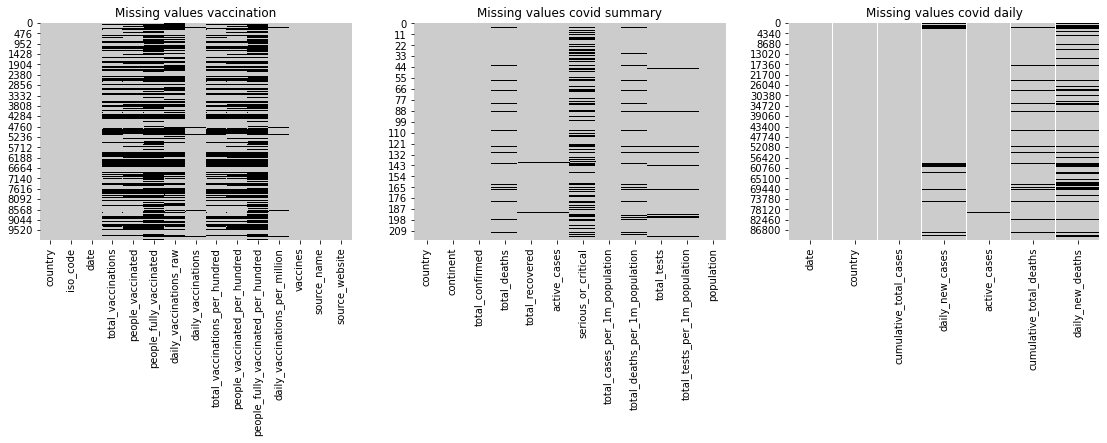

In [ ]:
plt.figure(figsize=(19, 4))
plt.subplot(1, 3, 1) 
sns.heatmap(data[2].isnull(), cbar=False, cmap='nipy_spectral_r')
plt.title('Missing values vaccination')
plt.subplot(1, 3, 2)
sns.heatmap(data[0].isnull(), cbar=False, cmap='nipy_spectral_r')
plt.title('Missing values covid summary')        
plt.subplot(1, 3, 3)
sns.heatmap(data[1].isnull(), cbar=False, cmap='nipy_spectral_r')
plt.title('Missing values covid daily')
plt.show()

<p>
By analyzing the missing values, all three data frames were found to have missing values. 
Since it is difficult to establish the reason for the missing values, we will use the following approaches. 
For data containing time series, we will use the resampling method. 
For data containing general information for all countries, we will do the following:
<br>
1. fill in the total_deaths column with zero values, since the total_confirmed column is the sum of the total_deaths, total_recovered and active_cases columns, and in the case of missing values
<br>
2.In the total_deaths column, the value in the total_confirmed column is equal to the sum of the total_recovered and active_cases columns, so it can be assumed that there were no deaths in the country;
<br>
3. we will simply delete the entries in which the values are missing in both the total_recovered column and the active_cases column, since it is difficult to guess what values there should be.
</p>

In [ ]:
data[0] = data[0][['country', 
                   'continent', 
                   'total_confirmed', 
                   'total_deaths', 
                   'total_recovered', 
                   'active_cases', 
                   'population']].copy()

display(data[0].iloc[191:212].style.set_caption(titles[0])\
                        .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#fa9b98')]}])\
                        .set_properties(**{'white-space': 'nowrap'})\
                        .highlight_null(null_color='#fa9b98')\
                        .set_precision(2))

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,population
191,Sweden,Europe,813191,13498.00,nan,nan,10147161
192,Switzerland,Europe,605342,10377.00,548375.00,46590.00,8702740
193,Syria,Asia,19526,1323.00,13316.00,4887.00,17821512
194,Taiwan,Asia,1050,10.00,1004.00,36.00,23849616
195,Tajikistan,Asia,13308,90.00,13218.00,0.00,9699456
196,Tanzania,Africa,509,21.00,183.00,305.00,61015869
197,Thailand,Asia,29571,95.00,27948.00,1528.00,69933377
198,Timor Leste,Asia,766,nan,294.00,472.00,1337442
199,Togo,Africa,11249,112.00,8348.00,2789.00,8425218
200,Trinidad And Tobago,North America,8192,145.00,7665.00,382.00,1402939


In [ ]:
data[0]['total_deaths'] = data[0]['total_deaths'].fillna(0)

data[0] = data[0].dropna()

display(data[0].iloc[191:212].style.set_caption(titles[0])\
                        .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#fa9b58')]}])\
                        .set_properties(**{'white-space': 'nowrap'})\
                        .highlight_null(null_color='#fa9b98')\
                        .set_precision(2))

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,population
193,Syria,Asia,19526,1323.00,13316.00,4887.00,17821512
194,Taiwan,Asia,1050,10.00,1004.00,36.00,23849616
195,Tajikistan,Asia,13308,90.00,13218.00,0.00,9699456
196,Tanzania,Africa,509,21.00,183.00,305.00,61015869
197,Thailand,Asia,29571,95.00,27948.00,1528.00,69933377
198,Timor Leste,Asia,766,0.00,294.00,472.00,1337442
199,Togo,Africa,11249,112.00,8348.00,2789.00,8425218
200,Trinidad And Tobago,North America,8192,145.00,7665.00,382.00,1402939
201,Tunisia,Africa,261177,8993.00,219912.00,32272.00,11912517
202,Turkey,Asia,3529601,32456.00,3130977.00,366168.00,85028056


<p style="font-family: Arials; font-size: 15px; color: 'Black">Checking dates for any errors.</p>

In [ ]:
check_date(df_dates, ['Checking dates in covid daily dataframe', 
                      'Checking dates in vaccination dataframe'])

Checking dates in covid daily dataframe 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 
 
 Date 
 2020-01-22 00:00:00 
 2020-01-23 00:00:00 
 2020-01-24 00:00:00 
 2020-01-25 00:00:00 
 2020-01-26 00:00:00 
 2020-01-27 00:00:00 
 2020-01-28 00:00:00 
 2020-01-29 00:00:00 
 2020-01-30 00:00:00 
 2020-01-31 00:00:00 
 2020-02-01 00:00:00 
 2020-02-02 00:00:00 
 2020-02-03 00:00:00 
 2020-02-04 00:00:00 
 2020-02-05 00:00:00 
 2020-02-06 00:00:00 
 2020-02-07 00:00:00 
 2020-02-08 00:00:00 
 2020-02-09 00:00:00 
 2020-02-10 00:00:00 
 2020-02-11 00:00:00 
 2020-02-12 00:00:00 
 2020-02-13 00:00:00 
 2020-02-14 00:00:00 
 2020-02-15 00:00:00 
 2020-02-16 00:00:00 
 2020-02-17 00:00:00 
 2020-02-18 00:00:00 
 2020-02-19 00:00:00 
 2020-02-20 00:00:00 
 2020-02-21 00:00:00 
 2020-02-22 00:00:00 
 2020-02-23 00:00:00 
 2020-02-24 00:00:00 
 2020-02-25 00:00:00 
 2020-02-26 00:00:00 
 2020-02-27 00:00:00 
 2020-02-28 00:00:00 
 2020-02-29 00:00:00 
 2020-03-01 00:00:00 
 2020-03-02 00:00:00 
 2020-03-03 00:00:00 
 2020-03-04 00:00:00 
 2020-03-05 00:00:00 
 2020-03-06 00:00:00 
 2020-03-07 00:00:00 
 2020-03-08 00:00:00 
 2020-03-09 00:00:00 
 2020-03-10 00:00:00 
 2020-03-11 00:00:00 
 2020-03-12 00:00:00 
 2020-03-13 00:00:00 
 2020-03-14 00:00:00 
 2020-03-15 00:00:00 
 2020-03-16 00:00:00 
 2020-03-17 00:00:00 
 2020-03-18 00:00:00 
 2020-03-19 00:00:00 
 2020-03-20 00:00:00 
 2020-03-21 00:00:00 
 2020-03-22 00:00:00 
 2020-03-23 00:00:00 
 2020-03-24 00:00:00 
 2020-03-25 00:00:00 
 2020-03-26 00:00:00 
 2020-03-27 00:00:00 
 2020-03-28 00:00:00 
 2020-03-29 00:00:00 
 2020-03-30 00:00:00 
 2020-03-31 00:00:00 
 2020-04-01 00:00:00 
 2020-04-02 00:00:00 
 2020-04-03 00:00:00 
 2020-04-04 00:00:00 
 2020-04-05 00:00:00 
 2020-04-06 00:00:00 
 2020-04-07 00:00:00 
 2020-04-08 00:00:00 
 2020-04-09 00:00:00 
 2020-04-10 00:00:00 
 2020-04-11 00:00:00 
 2020-04-12 00:00:00 
 2020-04-13 00:00:00 
 2020-04-14 00:00:00 
 2020-04-15 00:00:00 
 2020-04-16 00:00:00 
 2020-04-17 00:00:00 
 2020-04-18 00:00:00 
 2020-04-19 00:00:00 
 2020-04-20 00:00:00 
 2020-04-21 00:00:00 
 2020-04-22 00:00:00 
 2020-04-23 00:00:00 
 2020-04-24 00:00:00 
 2020-04-25 00:00:00 
 2020-04-26 00:00:00 
 2020-04-27 00:00:00 
 2020-04-28 00:00:00 
 2020-04-29 00:00:00 
 2020-04-30 00:00:00 
 2020-05-01 00:00:00 
 2020-05-02 00:00:00 
 2020-05-03 00:00:00 
 2020-05-04 00:00:00 
 2020-05-05 

<p style="font-family: Arials; font-size: 15px; color: 'Black">All the dates are in correct format</p>

<p style="font-family: Arials; font-size: 15px; color: 'Black">analyze categorical variables. We will adhere to the following algorithm:
<ul style="font-family: Arials; font-size: 15px; color: 'Black">    
<li>we have two data sources. This is information about infections and vaccinations. Let's check if the names of the countries in the data correspond, if not, we will bring them to a single format.;</li>
<li>we will remove duplicate information if it is present;</li>
<li>let's bring the spelling of countries to one format (all words with a capital letter);</li>
<li>let's check the spelling of the continents;</li>
<li>let's check the spelling of the names of the vaccines.</li>

In [ ]:
#displaying total vaccinations
uk_countries = data[2][data[2]['country'].isin(['England', 'Falkland Islands', 'Scotland', 'United Kingdom', 
                                                'Wales', 'Northern Ireland','Turks and Caicos Islands', 
                                                'Saint Helena','Guernsey', 'Jersey'])]\
                                         .groupby('country').sum()\
                                         .sort_values('total_vaccinations', ascending=False)['total_vaccinations']\
                                         .reset_index().set_index('country')

display(uk_countries.style.highlight_max(color='#95c5b1')\
                    .set_caption('Countries of the United Kingdom')\
                    .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                    .set_properties(**{'white-space': 'nowrap'})\
                    .applymap(lambda v: 'background-color: #c4c4c4' if v < uk_countries['total_vaccinations'].max() else '')\
                    .set_precision(2))

display(pd.DataFrame([{'United Kingdom': uk_countries.iloc[0]['total_vaccinations'], 
                       'United Kingdom countries': uk_countries.iloc[1:]['total_vaccinations'].sum(),
                       'Difference': uk_countries.iloc[1:]['total_vaccinations'].sum() - uk_countries.iloc[0]['total_vaccinations']}], 
                        index=['Total vaccinations'])\
                       .style.set_caption('Difference in the number of vaccinations')\
                       .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                       .set_properties(**{'white-space': 'nowrap'})\
                       .set_precision(2))

,total_vaccinations
country,
United Kingdom,1583827899.00
England,1338909638.00
Scotland,123532388.00
Wales,79412061.00
Northern Ireland,40944593.00
Jersey,478665.00
Guernsey,145962.00
Turks and Caicos Islands,30651.00
Falkland Islands,5434.00


,United Kingdom,United Kingdom countries,Difference
Total vaccinations,1583827899.00,1583462606.00,-365293.00


<p style="font-family: Arials; font-size: 15px; color: 'Black">According to Wikipedia, countries (England, Scotland, Wales, Northern Ireland, Jersey, Guernsey, Turks and Caicos Islands, Falkland Islands, Saint Helena (highlighted in gray)) are part of the United Kingdom. As you can see, the sum of all vaccinations in the UK is approximately equal to the sum of vaccinations in these countries. Thus, it can be assumed that this is duplication of information.</p>

<p style="font-family: Arials; font-size: 15px; color: 'Black">We will standardize the names of countries, remove duplicate information, and bring the spelling of countries to a single format (all words with a capital letter).</p>

In [ ]:
data[2] = data[2].replace({"Cote d'Ivoire": 'Cote D Ivoire', 'Czechia': 'Czech Republic',
                           'Hong Kong': 'China Hong Kong Sar','Macao': 'China Macao Sar',
                           'United Kingdom': 'UK', 'United States': 'USA', 'Vietnam': 'Viet Nam',
                           'North Macedonia': 'Macedonia'})

data[2] = data[2][~data[2]['country'].isin(['England', 'Falkland Islands', 'Guernsey',
                                            'Jersey', 'Northern Ireland', 'Saint Helena',
                                            'Scotland', 'Turks and Caicos Islands', 'Wales'])]

data[2]['country'] = np.where(~data[2]['country'].isin(['UK', 'USA']), 
                               data[2]['country'].str.title(), 
                               data[2]['country'])

display_html(pd.DataFrame([[country for country in data[2]['country'].unique() if country not in data[0]['country'].unique()]], 
                            index=['Vaccination country'])\
               .style.set_caption('Vaccination country not in covid country')\
               .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
               .set_properties(**{'white-space': 'nowrap'})\
               .set_table_attributes("style='display:inline'")._repr_html_() + " " +
             pd.DataFrame([data[0]['country'].unique()], index=['Covid country']).head(len(covid_summary))\
               .style.set_caption('Covid country')\
               .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])
               .set_properties(**{'white-space': 'nowrap'})\
               .set_table_attributes("style='display:inline'")._repr_html_(), raw=True)

Vaccination country not in covid country 0 1 2 3 4 5 6 
 
 Vaccination country 
 Brunei 
 Cape Verde 
 Kosovo 
 Netherlands 
 Northern Cyprus 
 Palestine 
 Sweden 
 
 Covid country 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 
 
 Covid country 
 Afghanistan 
 Albania 
 Algeria 
 Andorra 
 Angola 
 Anguilla 
 Antigua And Barbuda 
 Argentina 
 Armenia 
 Aruba 
 Australia 
 Austria 
 Azerbaijan 
 Bahamas 
 Bahrain 
 Bangladesh 
 Barbados 
 Belarus 
 Belgium 
 Belize 
 Benin 
 Bermuda 
 Bhutan 
 Bolivia 
 Bosnia And Herzegovina 
 Botswana 
 Brazil 
 British Virgin Islands 
 Brunei Darussalam 
 Bulgaria 
 Burkina Faso 
 Burundi 
 Cabo Verde 
 Cambodia 
 Cameroon 
 Canada 
 Caribbean Netherlands 
 Cayman Islands 
 Central African Republic 
 Chad 
 Channel Islands 
 Chile 
 China Hong Kong Sar 
 China Macao Sar 
 China 
 Colombia 
 Comoros 
 Congo 
 Costa Rica 
 Cote D Ivoire 
 Croatia 
 Cuba 
 Curacao 
 Cyprus 
 Czech Republic 
 Democratic Republic Of The Congo 
 Denmark 
 Djibouti 
 Dominica 
 Dominican Republic 
 Ecuador 
 Egypt 
 El Salvador 
 Equatorial Guinea 
 Eritrea 
 Estonia 
 Ethiopia 
 Faeroe Islands 
 Falkland Islands Malvinas 
 Fiji 
 Finland 
 France 
 French Guiana 
 French Polynesia 
 Gabon 
 Gambia 
 Georgia 
 Germany 
 Ghana 
 Gibraltar 
 Greece 
 Greenland 
 Grenada 
 Guadeloupe 
 Guatemala 
 Guinea Bissau 
 Guinea 
 Guyana 
 Haiti 
 Holy See 
 Honduras 
 Hungary 
 Iceland 
 India 
 Indonesia 
 Iran 
 Iraq 
 Ireland 
 Isle Of Man 
 Israel 
 Italy 
 Jamaica 
 Japan 
 Jordan 
 Kazakhstan 
 Kenya 
 Kuwait 
 Kyrgyzstan 
 Laos 
 Latvia 
 Lebanon 
 Lesotho 
 Liberia 
 Libya 
 Liechtenstein 
 Lithuania 
 Luxembourg 
 Macedonia 
 Madagascar 
 Malawi 
 Malaysia 
 Maldives 
 Mali 
 Malta 
 Marshall Islands 
 Martinique 
 Mauritania 
 Mauritius 
 Mayotte 
 Mexico 
 Micronesia 
 Moldova 
 Monaco 
 Mongolia 
 Montenegro 
 Montserrat 
 Morocco 
 Mozambique 
 Myanmar 
 Namibia 
 Nepal 
 New Caledonia 
 New Zealand 
 Nicaragua 
 Niger 
 Nigeria 
 Norway 
 Oman 
 Pakistan 
 Panama 
 Papua New Guinea 
 Paraguay 
 Peru 
 Philippines 
 Poland 
 Portugal 
 Qatar 
 Reunion 
 Romania 
 Russia 
 Rwanda 
 Saint Barthelemy 
 Saint Kitts And Nevis 
 Saint Lucia 
 Saint Martin 
 Saint Pierre And Miquelon 
 Saint Vincent And The Grenadines 
 Samoa 
 San Marino 
 Sao Tome And Principe 
 Saudi Arabia 
 Senegal 
 Serbia 
 Seychelles 
 Sierra Leone 
 Singapore 
 Sint Maarten 
 Slovakia 
 Slovenia 
 Solomon Islands 
 Somalia 
 South Africa 
 South Korea 
 South Sudan 
 Spain 
 Sri Lanka 
 State Of Palestine 
 Sudan 
 Suriname 
 Swaziland 
 Switzerland 
 Syria 
 Taiwan 
 Tajikistan 
 Tanzania 
 Thailand 
 Timor Leste 
 Togo 
 Trinidad And Tobago 
 Tunisia 
 Turkey 
 Turks And Caicos Islands 
 Uganda 
 UK 
 Ukraine 
 United Arab Emirates 
 Uruguay 
 USA 
 Uzbekistan 
 Vanuatu 
 Venezuela 
 Viet Nam 
 Wallis And Futuna Islands 
 Western Sahara 
 Yemen 
 Zambia 
 Zimbabwe

<p style="font-family: Arials; font-size: 15px; color: 'Black">All country names now match. Check the spelling of continents and vaccines.</p>

In [ ]:
display(pd.DataFrame([data[0]['continent'].unique()], index=['Continent']).T\
               .style.set_caption('Continent names')\
               .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
               .set_properties(**{'white-space': 'nowrap'}))

,Continent
0,Asia
1,Europe
2,Africa
3,North America
4,South America
5,Australia/Oceania


In [ ]:
display(pd.DataFrame([data[2]['vaccines'].unique()], index=['Vaccine']).T.sort_values('Vaccine')\
          .style.set_caption('Vaccine names')\
          .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
          .set_properties(**{'white-space': 'nowrap'}))

,Vaccine
18,"Covaxin, Oxford/AstraZeneca"
22,"EpiVacCorona, Sputnik V"
23,Johnson&Johnson
26,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
15,Moderna
16,"Moderna, Oxford/AstraZeneca"
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
17,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V"
14,"Moderna, Pfizer/BioNTech"
0,Oxford/AstraZeneca


In [ ]:
merge_covid = data[1].merge(data[0][['country', 'continent']]).set_index('date')

covid_weekly = merge_covid.resample('W').sum().reset_index().round(0)

display(covid_weekly.style.set_caption('Weekly Confirmed, Death and Active cases for 218 countries')\
                          .set_properties(**{'white-space': 'nowrap'})\
                          .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                          .set_properties(**{'white-space': 'nowrap'})\
                          .set_precision(0))


,date,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-01-26 00:00:00,7407,2173,7016,219,63
1,2020-02-02 00:00:00,71268,14461,68219,1545,281
2,2020-02-09 00:00:00,215858,22966,199106,4555,547
3,2020-02-16 00:00:00,417721,30417,358029,9735,862
4,2020-02-23 00:00:00,538406,7863,392159,15684,838
5,2020-03-01 00:00:00,593029,11019,319329,20037,429
6,2020-03-08 00:00:00,736959,29586,326184,23862,773
7,2020-03-15 00:00:00,1150767,91487,622240,35710,2714
8,2020-03-22 00:00:00,2230982,206535,1539296,73563,8168
9,2020-03-29 00:00:00,4363838,386190,3304972,177512,20438


<p style="font-family: Arials; font-size: 15px; color: 'Black">In order to compare countries in terms of the spread of the epidemic, it will not be correct to take the number of cases of infection, so we will calculate the following indicators from the total population of each country:
<ul style="font-family: Arials; font-size: 15px; color: 'Black">    
<li><b style='font-weight: bold; color: Black'>Confirmed %</b> - shows the percentage of the diseased population from the total population of the country;</li>
<li><b style='font-weight: bold; color: Black'>Deaths %</b> - shows the percentage of the deceased population of the total population of the country;</li>
<li><b style='font-weight: bold; color: Black'>Recovered %</b> - shows the percentage of the recovered population from the total population of the country;</li>
<li><b style='font-weight: bold; color: Black'>Cases %</b> - Shows the percentage of the population continuing to get sick from the total population of the country.</li>
</ul>  

In [ ]:
disease_prevalence_rates = data[0].sort_values('total_confirmed', ascending=False)


for col in disease_prevalence_rates.columns[2:6]:
    disease_prevalence_rates[col.split('_')[1].title() + ' %'] = disease_prevalence_rates[col] / disease_prevalence_rates['population'] * 100

disease_prevalence_rates = disease_prevalence_rates[['country', 
                                                     'Confirmed %', 
                                                     'Deaths %', 
                                                     'Recovered %', 
                                                     'Cases %']].round(2).sort_values('Confirmed %',ascending=False)


display(disease_prevalence_rates.sort_values('Confirmed %', ascending=False).set_index('country').T.iloc[:, 0:15]\
                                      .style.set_caption('Disease prevalence rates top 15<br><sub>in % from population</sub>')\
                                      .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                                      .set_properties(**{'white-space': 'nowrap'})\
                                      .set_precision(2)\
                                      .format({'Confirmed %': '{:2}%', 'Deaths %': '{:2}%', 'Recovered %': '{:2}%', 'Cases %': '{:2}%'}))

country,Andorra,Montenegro,Czech Republic,San Marino,Gibraltar,Slovenia,Luxembourg,USA,Israel,Aruba,Bahrain,Estonia,Lithuania,Panama,Portugal
Confirmed %,15.88,14.76,14.50,14.05,12.69,10.60,9.85,9.47,9.07,9.04,8.58,8.27,8.18,8.17,8.09
Deaths %,0.15,0.21,0.25,0.25,0.28,0.20,0.12,0.17,0.07,0.08,0.03,0.07,0.13,0.14,0.17
Recovered %,14.90,13.70,13.25,12.27,12.38,9.73,9.09,7.24,8.95,8.45,7.97,6.56,7.49,7.92,7.67
Cases %,0.84,0.86,1.00,1.53,0.03,0.68,0.64,2.07,0.05,0.50,0.58,1.64,0.55,0.11,0.26


<p style="font-family: Arials; font-size: 15px; color: 'Black">For a more correct display of the mortality rate of the population, we will calculate the mortality rate from the number of cases.</p>

In [ ]:
deaths_ratio = data[0].copy()

deaths_ratio['Deaths ratio'] = deaths_ratio['total_deaths'] / deaths_ratio['total_confirmed'] * 100

deaths_ratio = deaths_ratio[['country', 'continent', 'Deaths ratio']].round(2).sort_values('Deaths ratio', ascending=False)

display(deaths_ratio.sort_values('Deaths ratio', ascending=False).set_index('country').T.iloc[:, 0:15]\
                          .style.set_caption('Deaths ratio in the world top 15<br><sub>in % from confirmed</sub>')\
                          .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                          .set_properties(**{'white-space': 'nowrap'})\
                          .set_precision(2)\
                          .format({'Deaths ratio': '{:2}%'}))

country,Yemen,Western Sahara,Mexico,Sudan,Syria,Egypt,China,Ecuador,Montserrat,Somalia,Bolivia,Afghanistan,Liberia,Zimbabwe,Tanzania
continent,Asia,Africa,North America,Africa,Asia,Africa,Asia,South America,North America,Africa,South America,Asia,Africa,Africa,Africa
Deaths ratio,19.57,10.00,9.08,6.85,6.78,5.93,5.13,5.04,5.00,4.77,4.48,4.42,4.16,4.13,4.13


<p style="font-family: Arials; font-size: 15px; color: 'Black">Thus, we have prepared the following information:
<ul style="font-family: Arials; font-size: 15px; color: 'Black">    
<li><b style='font-weight: bold; color: Black'>Data on the weekly dynamics of the virus on a global scale.</b></li>
<li><b style='font-weight: bold; color: Black'>Calculated rates of сonfirmed, deaths, recovered, active cases by country.</b></li>
<li><b style='font-weight: bold; color: Black'>Calculated the mortality rate of the population from the number of cases of the virus.</b></li>
</ul>  

In [ ]:
vaccines = data[2].groupby(['country', 'vaccines']).count().reset_index()[['country', 'vaccines']]\
                  .groupby('vaccines').count()['country'].reset_index().sort_values('country', ascending=False)

vaccines.columns = ['Vaccines', 'Number of countries used']

display(vaccines.style.set_caption('Number of countries used vaccine')\
                      .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                      .set_properties(**{'white-space': 'nowrap'}))

,Vaccines,Number of countries used
9,Oxford/AstraZeneca,44
6,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",26
18,Pfizer/BioNTech,18
26,Sputnik V,9
22,Sinopharm/Beijing,9
10,"Oxford/AstraZeneca, Pfizer/BioNTech",8
20,"Pfizer/BioNTech, Sinovac",7
8,"Moderna, Pfizer/BioNTech",5
17,"Oxford/AstraZeneca, Sinovac",5
15,"Oxford/AstraZeneca, Sinopharm/Beijing",4


<p style="font-family: Arials; font-size: 15px; color: 'Black"> As you can see, data are not provided for every vaccine. Such data will not work. We will make a top for each vaccine.We will also indicate the country of the manufacturer.</p>

In [ ]:
vaccines_list = set([v.strip() for vac in vaccines['Vaccines'].unique() for v in vac.split(',')])

vaccine_dicts = vaccines.T.to_dict().values()

dict_vaccine = {}

for vaccine in vaccines_list:
    counter_countries = 0
    for vac in vaccine_dicts:
        if vaccine in vac['Vaccines']:
            counter_countries += list(vac.values())[-1]
    dict_vaccine[vaccine] = counter_countries


top_vaccine = pd.DataFrame([dict_vaccine], index=['Number of countries used']).T.sort_values('Number of countries used', ascending=False)


top_vaccine.loc[top_vaccine.index.isin(['Oxford/AstraZeneca']), 'The country of manufacture'] = 'Made in UK'
top_vaccine.loc[top_vaccine.index.isin(['Pfizer/BioNTech']), 'The country of manufacture'] = 'Made in Germany and USA'
top_vaccine.loc[top_vaccine.index.isin(['Moderna', 'Johnson&Johnson']), 'The country of manufacture'] = 'Made in USA'
top_vaccine.loc[top_vaccine.index.isin(['Sinopharm/Beijing', 'Sinovac', 'Sinopharm/Wuhan']), 'The country of manufacture'] = 'Made in China'
top_vaccine.loc[top_vaccine.index.isin(['Sinopharm/Beijing', 'Sinovac', 'Sinopharm/Wuhan']), 'The country of manufacture'] = 'Made in China'
top_vaccine.loc[top_vaccine.index.isin(['Sputnik V', 'EpiVacCorona']), 'The country of manufacture'] = 'Made in Russia'
top_vaccine.loc[top_vaccine.index.isin(['Covaxin']), 'The country of manufacture'] = 'Made in India'


display(top_vaccine.style.set_caption('Number of countries used vaccine')\
                   .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                   .set_properties(**{'white-space': 'nowrap'}))

,Number of countries used,The country of manufacture
Oxford/AstraZeneca,98,Made in UK
Pfizer/BioNTech,75,Made in Germany and USA
Moderna,35,Made in USA
Sinopharm/Beijing,24,Made in China
Sputnik V,20,Made in Russia
Sinovac,18,Made in China
Johnson&Johnson,2,Made in USA
Sinopharm/Wuhan,2,Made in China
Covaxin,1,Made in India
EpiVacCorona,1,Made in Russia


<p style="font-family: Arials; font-size: 18px; color: 'Black">country and vaccine used</p>

In [ ]:
country_vaccines = data[2].groupby(['country', 'vaccines']).count().reset_index()[['country', 'vaccines']]

display(country_vaccines.style.set_caption('What vaccines are used by countries')\
                               .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                               .set_properties(**{'white-space': 'nowrap'}))

,country,vaccines
0,Afghanistan,Oxford/AstraZeneca
1,Albania,"Pfizer/BioNTech, Sinovac"
2,Algeria,Sputnik V
3,Andorra,Pfizer/BioNTech
4,Angola,Oxford/AstraZeneca
5,Anguilla,Oxford/AstraZeneca
6,Antigua And Barbuda,Oxford/AstraZeneca
7,Argentina,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V"
8,Australia,"Oxford/AstraZeneca, Pfizer/BioNTech"
9,Austria,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


<p style="font-family: Arials; font-size: 15px; color: 'Black">Using Resampling method again and group the data in a weekly context by illness, active case, and death, and add information about vaccinations to it.</p>

In [ ]:
global_vaccination = data[2].groupby('date').sum().resample('W')\
                                            .sum().reset_index()[['date', 'total_vaccinations', 'daily_vaccinations']]\
                                            .merge(covid_weekly)\
                                            .round(0)

display(global_vaccination.style.set_caption('Global_vaccination')\
                                .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                                .set_properties(**{'white-space': 'nowrap'})\
                                .set_precision(0))

,date,total_vaccinations,daily_vaccinations,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-12-13 00:00:00,86465,0,489511702,4341939,116456572,11034018,77543
1,2020-12-20 00:00:00,2814247,1562394,520275483,4417131,121148929,11592413,80907
2,2020-12-27 00:00:00,6616660,3436763,550018496,3904172,125371744,12141023,72318
3,2021-01-03 00:00:00,26180869,5839956,578278551,4296142,128331266,12671581,78445
4,2021-01-10 00:00:00,71899364,10137089,611074074,5101694,135615603,13248778,90089
5,2021-01-17 00:00:00,154222033,15962843,645739706,4717903,145176994,13903719,95465
6,2021-01-24 00:00:00,286966674,23496179,676063783,4066362,149124347,14579748,98719
7,2021-01-31 00:00:00,481780994,29262940,702973559,3655471,150091613,15272969,97380
8,2021-02-07 00:00:00,633758908,35647066,726418729,3113191,147288341,15913334,86797
9,2021-02-14 00:00:00,828182692,39231363,746521113,2693418,142299035,16490472,79031


<p style="font-family: Arials; font-size: 15px; color: 'Black">Vaccination process and its calculation. Let's calculate the total number of vaccinations for each country (we divide this number by 2, since usually there are 2 vaccines per person) from the entire population of the country.</p>

In [ ]:
country_vaccination = data[2].groupby('country').sum().reset_index()

country_vaccination = country_vaccination.merge(covid_summary)[['country', 
                                                                'daily_vaccinations', 
                                                                'population']]

country_vaccination['Vaccination rate %'] = round((country_vaccination['daily_vaccinations'] / 2) / country_vaccination['population'], 4) 

display(country_vaccination.sort_values('Vaccination rate %', ascending=False).set_index('country').T.iloc[:, 0:15]\
                   .style.set_caption('Vaccination rate %')\
                   .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                   .set_properties(**{'white-space': 'nowrap'})\
                   .set_precision(2))



country,Gibraltar,Israel,Seychelles,Bhutan,United Arab Emirates,Cayman Islands,Bermuda,Isle Of Man,Chile,UK,Monaco,USA,Bahrain,Malta,Maldives
daily_vaccinations,61962.00,10136610.00,101479.00,692169.00,7710920.00,48532.00,36502.00,49492.00,10708583.00,36175196.00,20385.00,157424562.00,770217.00,194330.00,240503.00
population,33683.00,9197590.00,98810.00,778058.00,9981074.00,66308.00,62102.00,85375.00,19240888.00,68157337.00,39454.00,332479117.00,1745999.00,442439.00,547751.00
Vaccination rate %,0.92,0.55,0.51,0.44,0.39,0.37,0.29,0.29,0.28,0.27,0.26,0.24,0.22,0.22,0.22


<p style="font-family: Arials; font-size: 15px; color: 'Black">In order to see the dynamics of vaccination in terms of vaccines, we will prepare information on the daily vaccination of countries in terms of vaccines.</p>

In [ ]:
daly_total_vaccinations = data[2].groupby(['date', 'vaccines'])['total_vaccinations'].sum().reset_index()

display(daly_total_vaccinations.head().style.set_caption('Daily vaccinations by type of vaccine')\
                                      .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                                      .set_properties(**{'white-space': 'nowrap'})\
                                      .set_precision(2))


,date,vaccines,total_vaccinations
0,2020-12-13 00:00:00,"Oxford/AstraZeneca, Pfizer/BioNTech",86465.00
1,2020-12-14 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",5.00
2,2020-12-14 00:00:00,"Oxford/AstraZeneca, Pfizer/BioNTech",0.00
3,2020-12-15 00:00:00,"EpiVacCorona, Sputnik V",28500.00
4,2020-12-15 00:00:00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",723.00


<p style="font-family: Arials; font-size: 15px; color: 'Black">Thus, we have prepared the following information:
<ul style="font-family: Arials; font-size: 15px; color: 'Black">    
<li><b style='font-weight: bold; color: Black'>Worldwide weekly vaccination data.</b></li>
<li><b style='font-weight: bold; color: Black'>The vaccination ratio was calculated, reflecting the intensity of vaccination of the population in the context of countries.</b></li>
<li><b style='font-weight: bold; color: Black'>Information on the daily vaccination of the population by country and the vaccines used.</b></li>     
</ul>
<p style="font-family: Arials; font-size: 15px; color: 'Black">Thus, we have prepared all the necessary information about ready to start the battle (data visualization).</p>

<p style="font-family: Arials; font-size: 15px; color: 'Black">At the first stage, we will use the information on the spread of the infection until 12/13/2020. After this date, the vaccination phase will begin. We will cover this time period in the third part.</p>

In [ ]:
visualize_scatter_graph(2, covid_weekly[['date', 'cumulative_total_cases', 'cumulative_total_deaths']].iloc[:47], 'tozeroy',
            ['Total infected', 'Total deaths'], [colors[6], colors[0]], 
            'The weekly dynamics of the spread of the disease around the world', 
            'Cumulative data on the number of infections and deaths','Count')

<p style="font-family: Arials; font-size: 15px; color: 'Black">As per the above graphs the total cases are increased at a rapid rate while the total deaths are taking its stands in the graph</p>

In [ ]:
visualize_scatter_graph(3, covid_weekly[['date', 'daily_new_cases', 'active_cases', 'daily_new_deaths']].iloc[:47], 'none',
            ['Weekly new infected', 'Weekly active cases', 'Weekly new deaths'], [colors[6], colors[4], colors[0]], 
            'The weekly dynamics of the spread of the disease around the world', 
            'Data on weekly infections, active cases and deaths (not cumulative data)', 'Count')

<p style="font-family: Arials; font-size: 15px; color: 'Black">From the above graph it is clear that the number of daily infections, deaths and sick people is growing rapidly.</p>

In [ ]:
fig = px.choropleth(
         disease_prevalence_rates,
         locations="country",
         locationmode='country names', 
         color='Confirmed %', 
         hover_data=['Confirmed %'], 
         color_continuous_scale="reds" #
)


fig.update_layout(
    title_text='Total infected in the world<br><sub>In % from population</sub>',
    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),

       font=dict(
       family='Arials',
       size=14, 
       color='black'
    )
)

fig.show()

<p style="font-family: Arials; font-size: 15px; color: 'Black">The following countries have taken the worst hit: <b style='font-weight: bold; color: Black'>Andorra, Montenegro, Czech Republic, Gibraltar, San Marino, Slovenia, Luxembourg, USA, Israel, Aruba.</b> The level of infection of the population in them is the highest. This can be seen by the color on the heatmap. The brighter the red color, the stronger the infection rate in the country.</p>

In [ ]:
fig = px.scatter_geo(
         deaths_ratio, 
         locations='country', 
         color='continent', 
         locationmode='country names', 
         hover_name='country',  
         size='Deaths ratio' 
)

fig.update_layout(
    title_text='Death rate in the world<br><sub>In % of cases</sub>',
    legend_orientation='h', 
    legend_title_text='', 
    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),
    font=dict(
       family='Arials',
       size=14, 
       color='black'
    )
)

fig.show()

<p style="font-family: Arials; font-size: 15px; color: 'Black">But it is worth noting that the level of infection does not yet indicate the strength of global pandemice. The worst consequences of the virus are the death of the infected. In this context, the most severe blow fell on <b style='font-weight: bold; color: Black'>Yemen, Western Sahara, Mexico, Sudan, Syria, Egypt, Ecuador, China, Montserrat, Bolivia.</b> On the graph, this can be seen from the volume of bubbles, the larger the volume, the higher the death rate in the country.</p>

In [ ]:
visualize_bar_graph(3, disease_prevalence_rates[['country', 'Deaths %', 'Cases %', 'Recovered %']], 
                     ['Deaths', 'Active', 'Recovered'], [colors[0], colors[4], colors[2]], 
                     'Dynamics of the spread of the disease in the context of сountries', 
                     'The percentage of recovered, active and deaths from the total population of the сountries', 
                     '', 'Percents, (%)', 'overlay')

<p style="font-family: Arials; font-size: 15px; color: 'Black">Summing up the results, we note how the virus has taken this planet to standstill and how imposing lockdown and other precautionary measures helped many countries to slowdown their infection rate. It is also worth noting that each country has different resistance to the virus. This can be seen in the graph, which displays the percentage of recovered, died and sick from the total population of each country.</p>

<p style="font-family: Arials; font-size: 15px; color: 'Black">Infection, death, recovey after introducing vaccines.</p>

In [ ]:
fig = go.Figure(go.Bar(
         hoverinfo='skip',
         x=top_vaccine.sort_values(by='Number of countries used')['Number of countries used'], 
         y=top_vaccine.sort_values(by='Number of countries used').index, 
         hovertemplate ='<b>Number of countries using vaccines: %{x}</b><br>', 
         orientation='h',
         marker_color=colors[6], 
         name='',
         text=top_vaccine.sort_values(by='Number of countries used')['The country of manufacture'],
         textposition='auto'))


fig.update_layout(
    title=f'Vaccines used in different countries', 
    plot_bgcolor='rgba(0,0,0,0)', 
    barmode='group', 
    bargap=0.15,
    hovermode='y',
    font=dict(
         family='Arials', 
         size=13, 
         color='black'))

fig.update_xaxes(showticklabels=False)

flags = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\countries_continents_codes_flags_url.csv')

flag_image_links = [
                    flags[flags['country'] == 'United Kingdom']['image_url'].to_string().split(' ')[4],
                    flags[flags['country'] == 'United States']['image_url'].to_string().split(' ')[4],
                    flags[flags['country'] == 'Germany']['image_url'].to_string().split(' ')[4],
                    flags[flags['country'] == 'China']['image_url'].to_string().split(' ')[4],
                    flags[flags['country'] == 'Russia']['image_url'].to_string().split(' ')[4],
                    flags[flags['country'] == 'India']['image_url'].to_string().split(' ')[4]
]

image_position = [
                  [1.006, 0.912], 
                  [0.830, 0.809], 
                  [0.885, 0.809], 
                  [0.417, 0.709], 
                  [0.296, 0.609], 
                  [0.296, 0.509], 
                  [0.224, 0.409], 
                  [0.224, 0.309], 
                  [0.224, 0.209], 
                  [0.224, 0.109], 
                  [0.224, 0.009]
]

manufacture = top_vaccine.index.tolist()
manufacture.insert(3, manufacture[2])
manufacture[7], manufacture[8] = manufacture[8], manufacture[7]
manufacture[-1], manufacture[9] = manufacture[9], manufacture[-1]

for vaccine in zip(image_position, manufacture):
    if vaccine[1] == 'Oxford/AstraZeneca':
        fig.add_layout_image(
            dict(
                source=flag_image_links[0],
                x=vaccine[0][0], y=vaccine[0][1],
                sizex=0.05, sizey=0.081,
                xanchor="right", yanchor="bottom",
                sizing='stretch'
        )
    )
        
    elif vaccine[1] == 'Pfizer/BioNTech':
        fig.add_layout_image(
            dict(
                source=flag_image_links[2],
                x=vaccine[0][0], y=vaccine[0][1],
                sizex=0.05, sizey=0.081,
                xanchor="right", yanchor="bottom",
                sizing='stretch'
        )
    )    
               
    elif vaccine[1] in ('Moderna', 'Johnson&Johnson'):
        fig.add_layout_image(
            dict(
                source=flag_image_links[1],
                x=vaccine[0][0], y=vaccine[0][1],
                sizex=0.05, sizey=0.081,
                xanchor="right", yanchor="bottom",
                sizing='stretch'
        )
    )
        
    elif vaccine[1] in ('Sinopharm/Beijing', 'Sinovac','Sinopharm/Wuhan'):
        fig.add_layout_image(
            dict(
                source=flag_image_links[3],
                x=vaccine[0][0], y=vaccine[0][1],
                sizex=0.05, sizey=0.081,
                xanchor="right", yanchor="bottom",
                sizing='stretch'
        )
    )  
    
    elif vaccine[1] in ('Sputnik V', 'EpiVacCorona'):
        fig.add_layout_image(
            dict(
                source=flag_image_links[4],
                x=vaccine[0][0], y=vaccine[0][1],
                sizex=0.05, sizey=0.081,
                xanchor="right", yanchor="bottom",
                sizing='stretch'
        )
    )
        
    elif vaccine[1] == 'Covaxin':
        fig.add_layout_image(
            dict(
                source=flag_image_links[5],
                x=vaccine[0][0], y=vaccine[0][1],
                sizex=0.05, sizey=0.081,
                xanchor="right", yanchor="bottom",
                sizing='stretch'
        )
    )

fig.show()

<p style="font-family: Arials; font-size: 15px; color: 'Black">These countries with the number of vaccines produced and are currently used world wide,
 USA - 3
 China - 3
 Russia - 2
 India - 1
 UK - 1
 The vaccine produced by UK which is oxford/Astra zenca is used more around the world.
</p>

In [ ]:
fig = px.choropleth(
         country_vaccines,
         locations='country', 
         color='vaccines', 
         locationmode='country names' 
)

fig.update_layout(
    title_text='Vaccines used in different countries',
    showlegend=False,
    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),
       font=dict(
           family='Arials',
           size=14, 
           color='black'
    )
)
fig.show()

<p style="font-family: Arials; font-size: 15px; color: 'Black">On the map above, you can see which vaccines are used by different countries</p>
<p style="font-family: Arials; font-size: 15px; color: 'Black">Thus, Vaccination process increase the immunation power againist the virus</p>

In [ ]:
visualize_scatter_graph(3, global_vaccination[['date', 'total_vaccinations', 'cumulative_total_cases', 'cumulative_total_deaths']].loc[:16], 'tozeroy', 
            ['Total vaccinations', 'Total infected', 'Total deaths'], [colors[2], colors[6], colors[0]], 
            'Virus Spread', 
            'Cumulative data on the number of vaccinations, infections and deaths','Count')

<p style="font-family: Arials; font-size: 15px; color: 'Black">Global vaccination began at the end of 2020, and in mid-February, the number of vaccinations exceeded the number of infected, which slowed down the growth of the infected population, but did not completely suppress it. Unfortunately, the virus cannot be defeated like in the movies, in life everything is much more complicated, but definitely a positive trend is still observed,as seen in the graph (cumulative amount).</p>

In [ ]:
visualize_scatter_graph(4, global_vaccination[['date', 'daily_vaccinations', 'daily_new_cases', 'active_cases', 'daily_new_deaths']].loc[:16], 'none',
            ['Weekly vaccinations', 'Weekly new infected', 'Weekly active cases', 'Weekly new deaths'], [colors[2], colors[6], colors[4], colors[0]], 
            'Virus Spread', 
            'Data on weekly vaccinations, infections, active cases and weekly deaths (not cumulative data)', 'Count')

<p style="font-family: Arials; font-size: 15px; color: 'Black">A similar trend is observed in the weekly dynamics. The increase in the weekly number of infected, sick and dead is slowing down with an increase in vaccination of the population (not cumulatively, but weekly).</p>

In [ ]:
print(country_vaccination)
fig = px.choropleth(
         country_vaccination, 
         locations="country",
         locationmode='country names', 
         color="Vaccination rate %", 
         color_continuous_scale="greens" 
)


fig.update_layout(
    title_text='Total vaccinations in the world<br><sub>In % from population</sub>',
    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),
       font=dict(
           family='Arials',
           size=14, 
           color='black'
    )
)

fig.show()

                  country  daily_vaccinations  population  Vaccination rate %
0             Afghanistan            49509.00    39590542                0.00
1                 Albania           167507.00     2875401                0.03
2                 Algeria            69070.00    44450327                0.00
3                 Andorra            11473.00       77359                0.07
4                  Angola           107497.00    33635465                0.00
..                    ...                 ...         ...                 ...
147  United Arab Emirates          7710920.00     9981074                0.39
148               Uruguay           763979.00     3482896                0.11
149             Venezuela            62213.00    28374458                0.00
150              Viet Nam            50715.00    98003967                0.00
151              Zimbabwe           101469.00    15026922                0.00

[152 rows x 4 columns]


<p style="font-family: Arials; font-size: 15px; color: 'Black">The most active resistance (vaccination) of the virus was provided by the following countries: Gibraltar, Israel, Seychelles, United Arab Emirates, Cayman Islands, Bermuda, Monaco, Chile, Great Britain, Anguilla and these countries have highest vaccination rate and the graph repesents the vaccine distribution with green pallet darker the color is highest is the vaccination process.</p>

In [ ]:
visualize_scatter_graph(2, global_vaccination[['date', 'daily_vaccinations', 'daily_new_cases']].loc[:16], 'tozeroy',
            ['Weekly vaccinations', 'Weekly new infected'], [colors[2], colors[6]], 
            'The dynamics of the spread of the disease around the world, taking into account the global vaccination', 
            'Data on weekly vaccinations and new cases (not cumulative data)', 'Count')

<p style="font-family: Arials; font-size: 15px; color: 'Black">
Thus, it is impossible to say unequivocally that humanity is gaining in the third round. Yes, the vaccine has slowed the spread of the infection, reducing the trend of an increase in the number of cases, but the virus continues to resist. Thus, it is too early to talk about the end of the battle, since no one knows what new blow the darkness will inflict.
</p>

In [ ]:
fig = px.line(
         daly_total_vaccinations,
         x='date', 
         y='total_vaccinations', 
         color='vaccines' 
)

fig.update_layout(
    showlegend=False,
    title=f'Daily vaccinations by vaccine used',
    xaxis_title='Time Period', 
    yaxis_title='Total vaccinations',
    plot_bgcolor='rgba(0,0,0,0)', 
    hovermode="x", 
    font=dict(
        family='Arials',
        size=14, 
        color='black'
    )
)

fig.show()

<p style="font-family: Arials; font-size: 15px; color: 'Black">Based on the plotted graph, the following conclusions can be drawn:</p>
<ul style="font-family: Arials; font-size: 15px; color: 'Black">    
<li>Johnson&Johnson, Moderna, Pfizer/BioNTech are the companies most used in the vaccination process</li>
<li>Vaccination in countries where only vaccines Sinopharm / Beijing, Sinopharm / Wuhan, Sinovac (produced in China) are used is produced in a phased mode.This may be due either to the high demand for vaccines among the population.</li>
<li>Moderna, Oxford / AstraZeneca, Pfizer / BioNTech vaccines using countries have seen a decrease in the number of vaccinations because of the side effects</li>     
</ul>

In [ ]:
df = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\2021_04_09\reference_hospitalization_all_locs.csv')
df['date'] = df['date'].astype('datetime64')
graph = go.Scatter(
                   x=df['date'].iloc[:514], 
                   y=df['totdea_mean'].iloc[:514], 
) 

fig = go.Figure(graph)

fig.update_layout(
        title=f'Projected Deaths with respect to time', 
        xaxis_title='date', 
        yaxis_title='total_deaths_mean', 
        plot_bgcolor='rgba(0,0,0,0)',
        hovermode='closest',
        legend_orientation='h',
        font=dict(
            family='Arials',
            size=14, 
            color='black'
            )
)

fig.show()

<p style="font-family: Arials; font-size: 15px; color: 'Black">This graph helps to understand the death rate all across the globe, so the death rate is growing up indicating a lot of deaths in the near future
</p>

In [ ]:
df = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\top5\country_vaccinations.csv')
df_top5 = df.groupby([df.country]).sum().sort_values(by='total_vaccinations',ascending=False)[0:10]

fig = px.bar(df_top5, y='total_vaccinations')
fig.update_layout(
        title='Top 5 Countries for Daily Vaccinations'
)
fig.show()

In [ ]:
all_countries = []
all_percentages = []

csv = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\2021_04_09\Vaccination.csv')
for item in csv.iterrows():
    all_countries.append(item[1]['Country'])
    a = int(item[1]['Total Tests']) 
    b = int(item[1]['Population'])
    if a<b:
        p = (a / b) * 100
    else:
        p = (a / (2 * b)) * 100
    p = int(p)
    all_percentages.append(p)

data_frame1 = pd.DataFrame()
data_frame1['Countries'] = all_countries
data_frame1['percentage'] = all_percentages

fig = px.bar(data_frame1, y='percentage', x='Countries')
fig.update_layout(
        title='Countries Vaccination Percentages'
)
fig.show()


In [ ]:
fig = px.choropleth(
         data_frame1,
         locations='Countries', 
         color='Countries', 
         locationmode='country names',
         hover_name='percentage'
)

fig.update_layout(
    title_text='People yet to be vaccinated(in million)',
    showlegend=False,
    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),

       font=dict(
           family='Arials',
           size=22, 
           color='black'
    )
)
fig.show()

In [ ]:
labels = ['Vaccinated','Not - Vaccinated']
s = 7818682794 - 4166595347
values = [s, 4166595347]


graph = go.Pie(labels = labels,
                   values = values,
                   hoverinfo = 'label+percent')

layout = go.Layout(height = 600,
                   width = 600,
                   autosize = False,
                    title = 'Vaccinated vs Not Vaccinated'
                  )
fig = go.Figure(data = graph, layout = layout)
fig.show()

In [ ]:
vaccines_data_frame = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\3\country_vaccinations.csv')
px.scatter_geo
map_fig = px.scatter_geo(vaccines_data_frame, 
                                            locations='ISO_code',
                                            projection ='orthographic',
                                            color='country',
                                            opacity = .8,
                                            hover_data = ['vaccines']
                                            )
map_fig.show()

In [ ]:
forecast_data_frame = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\cumulative-covid-vaccinations (2).csv')
forecast_data_frame

,Entity,Code,Day,total_vaccinations
0,Afghanistan,AFG,2/22/2021,0.00
1,Afghanistan,AFG,2/28/2021,8200.00
2,Afghanistan,AFG,3/16/2021,54000.00
3,Afghanistan,AFG,4/7/2021,120000.00
4,Albania,ALB,1/10/2021,0.00
...,...,...,...,...
8248,Zimbabwe,ZWE,4/14/2021,262128.00
8249,Zimbabwe,ZWE,4/15/2021,285881.00
8250,Zimbabwe,ZWE,4/16/2021,304701.00
8251,Zimbabwe,ZWE,4/17/2021,311901.00


In [ ]:
#--Creating a forecast data frame----
forecast_data_frame['Day'] = pd.to_datetime(forecast_data_frame['Day'])
forecast_data_frame['Day'] =  forecast_data_frame['Day'].astype('datetime64')
forecast_data_frame['Day'] 

0      2021-02-22
1      2021-02-28
2      2021-03-16
3      2021-04-07
4      2021-01-10
          ...    
8248   2021-04-14
8249   2021-04-15
8250   2021-04-16
8251   2021-04-17
8252   2021-04-18
Name: Day, Length: 8253, dtype: datetime64[ns]

<p style="font-family: Arials; font-size: 15px; color: 'Black">Dates used for forecasting which is starting from feb 2021 to April 2021
</p>

In [ ]:
warnings.filterwarnings('ignore')
X_train = forecast_data_frame[forecast_data_frame['Day'] < '2021-04-10']
X_valid = forecast_data_frame[forecast_data_frame['Day'] >= '2021-04-10']

print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)
print('\n\n\n')
X_train['Day'] =  X_train['Day'].astype('datetime64')
X_valid['Day'] =  X_valid['Day'].astype('datetime64')

print(X_train, X_valid)

X_train Shape (6715, 4)
X_Valid Shape (937, 4)




           Entity Code        Day  total_vaccinations
0     Afghanistan  AFG 2021-02-22                0.00
1     Afghanistan  AFG 2021-02-28             8200.00
2     Afghanistan  AFG 2021-03-16            54000.00
3     Afghanistan  AFG 2021-04-07           120000.00
4         Albania  ALB 2021-01-10                0.00
...           ...  ...        ...                 ...
8239     Zimbabwe  ZWE 2021-04-05           145510.00
8240     Zimbabwe  ZWE 2021-04-06           162633.00
8241     Zimbabwe  ZWE 2021-04-07           179417.00
8242     Zimbabwe  ZWE 2021-04-08           193677.00
8243     Zimbabwe  ZWE 2021-04-09           206205.00

[6715 rows x 4 columns]         Entity Code        Day  total_vaccinations
45     Albania  ALB 2021-04-10           256810.00
46     Albania  ALB 2021-04-12           267531.00
47     Albania  ALB 2021-04-13           281216.00
48     Albania  ALB 2021-04-15           304488.00
49     Albania  ALB 2

In [ ]:
# filtering the train data
au = X_train[X_train['Entity'] == 'Russia']
au2 = au[['Day', 'total_vaccinations']]
df_train1 = pd.DataFrame(au)

#filtering the valid data
au_v = X_valid[X_valid['Entity'] == 'Russia']
au_v2 = au_v[['Day', 'total_vaccinations']]
df_valid1 = pd.DataFrame(au_v)

# set the date into index
au2.set_index('Day', inplace=True)
au_v2.set_index('Day', inplace=True)

df_train1['Day'] =  pd.to_datetime(df_train1['Day'])
df_valid1['Day'] =  pd.to_datetime(df_valid1['Day'])

# Setting the Index for 2 months
two_weeks_forecast_dates = pd.date_range('2021-04-10', freq='D', periods = 10)

print(au2)
print('------------------------------')
print('------------------------------')
print(au_v2)
print('------------------------------')
print('------------------------------')
print(two_weeks_forecast_dates)

            total_vaccinations
Day                           
2020-12-15            28500.00
2020-12-22            52000.00
2021-01-02           800000.00
2021-01-13          1000000.00
2021-02-10          3900000.00
2021-03-01          5238966.00
2021-03-02          5249831.00
2021-03-03          5489342.00
2021-03-04          6010744.00
2021-03-05          6301854.00
2021-03-06          6583873.00
2021-03-07          6655487.00
2021-03-08          6669466.00
2021-03-09          6694349.00
2021-03-10          7048129.00
2021-03-11          7273933.00
2021-03-12          7448262.00
2021-03-13          7639374.00
2021-03-14          7698889.00
2021-03-17          7818009.00
2021-03-18          7909438.00
2021-03-19          8185944.00
2021-03-20          8306498.00
2021-03-21          8362575.00
2021-03-29         11124350.00
2021-03-30         11183108.00
2021-03-31         11373572.00
2021-04-01         11642295.00
2021-04-02         11779295.00
2021-04-03         12038859.00
2021-04-

The MSE of ARIMA is: 434.5411430601498


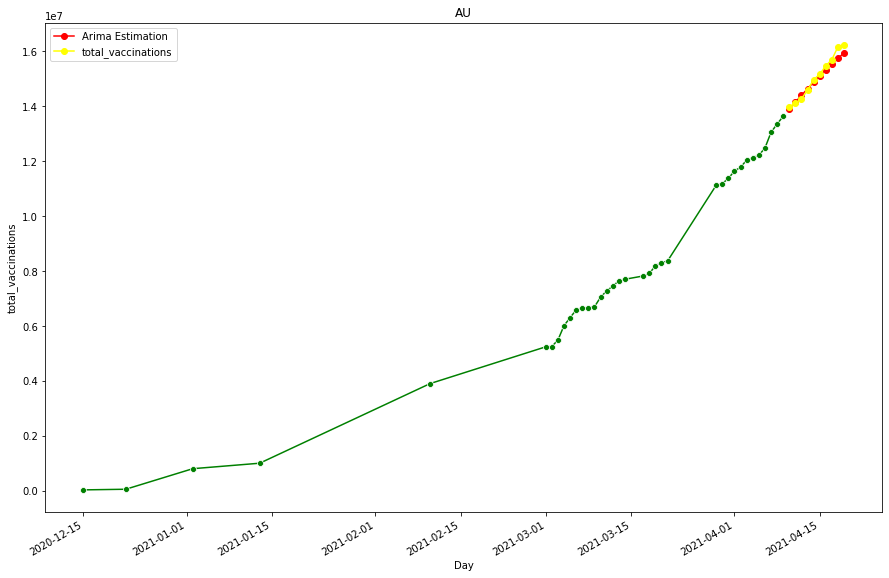

In [ ]:
warnings.filterwarnings('ignore')

# Running ARIMA with random numbers
model_arima = ARIMA(au2, order=(2,2,2)) # start 2-0-0 and move to the best
model_arima_fit = model_arima.fit(disp=-1)

# Saving ARIMA predictions
fcast1 = model_arima_fit.forecast(10)[0]

# Passing the same index as the others
fcast1 = (pd.Series(fcast1, index=two_weeks_forecast_dates)).astype(int)
fcast1 = fcast1.rename("Arima Estimation") 

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,10))
chart = sns.lineplot(x='Day', y='total_vaccinations', data = au2,color="green",marker="o")
chart.set_title('AU')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
au_v2.plot(ax=ax, color='yellow', marker="o", legend=True)

#print(fcast1.values)
# Printing the AI
print('The MSE of ARIMA is:', m.sqrt(mean_squared_error(df_valid1['total_vaccinations'].values, fcast1.values, squared=False)))

In [ ]:
au = X_train[X_train['Entity'] == 'Russia']
au2 = au[['Day', 'total_vaccinations']]
df_train1 = pd.DataFrame(au)


au_v = X_valid[X_valid['Entity'] == 'Russia']
au_v2 = au_v[['Day', 'total_vaccinations']]
df_valid1 = pd.DataFrame(au_v)


au2.set_index('Day', inplace=True)
au_v2.set_index('Day', inplace=True)

df_train1['Day'] =  pd.to_datetime(df_train1['Day'])
df_valid1['Day'] =  pd.to_datetime(df_valid1['Day'])


two_weeks_forecast_dates1 = pd.date_range('2021-04-10', freq='D', periods = 10)

regressor = LinearRegression()
regressor.fit(df_train1['Day'].values.reshape(-1,1) , df_train1['total_vaccinations'].values)
regressor_pred = regressor.predict(two_weeks_forecast_dates1.values.reshape(-1,1).astype(float))


t_fcast4 = pd.Series(regressor_pred).astype(int)
t_fcast4 = t_fcast4.rename("Total Vaccinations")

print(au2)
print(au_v2)

forecast_df = pd.DataFrame()
forecast_df['Day'] = two_weeks_forecast_dates1
forecast_df['total_vaccines'] = t_fcast4
forecast_df['Day'] = forecast_df['Day'].astype('datetime64')
forecast_df.set_index('Day')
forecast_df

            total_vaccinations
Day                           
2020-12-15            28500.00
2020-12-22            52000.00
2021-01-02           800000.00
2021-01-13          1000000.00
2021-02-10          3900000.00
2021-03-01          5238966.00
2021-03-02          5249831.00
2021-03-03          5489342.00
2021-03-04          6010744.00
2021-03-05          6301854.00
2021-03-06          6583873.00
2021-03-07          6655487.00
2021-03-08          6669466.00
2021-03-09          6694349.00
2021-03-10          7048129.00
2021-03-11          7273933.00
2021-03-12          7448262.00
2021-03-13          7639374.00
2021-03-14          7698889.00
2021-03-17          7818009.00
2021-03-18          7909438.00
2021-03-19          8185944.00
2021-03-20          8306498.00
2021-03-21          8362575.00
2021-03-29         11124350.00
2021-03-30         11183108.00
2021-03-31         11373572.00
2021-04-01         11642295.00
2021-04-02         11779295.00
2021-04-03         12038859.00
2021-04-

,Day,total_vaccines
0,2021-04-10,11724024
1,2021-04-11,11846329
2,2021-04-12,11968634
3,2021-04-13,12090939
4,2021-04-14,12213245
5,2021-04-15,12335550
6,2021-04-16,12457855
7,2021-04-17,12580160
8,2021-04-18,12702465
9,2021-04-19,12824771


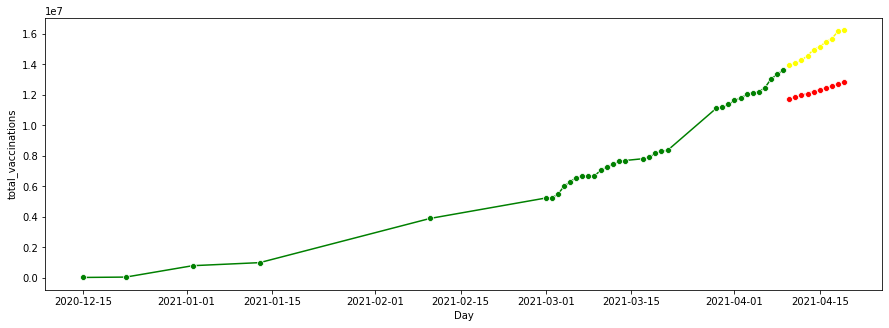

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

chart   = sns.lineplot(x='Day', y='total_vaccinations', data = au2, color="green",marker="o", legend=True,linestyle='solid')
chart2 = sns.lineplot(x='Day', y='total_vaccines', data=forecast_df, color='red', marker="o", legend=True, linestyle='solid')
chart3 = sns.lineplot(x='Day', y='total_vaccinations', data=au_v2, color='yellow', marker="o", legend=True, linestyle='solid')

fig.show()


In [ ]:
print('The MSE of LR is:', m.sqrt(mean_squared_error(df_valid1['total_vaccinations'].values,t_fcast4.values, squared=False)))

The MSE of LR is: 1680.4787566032444


<p style="font-family: Arials; font-size: 15px; color: 'Black">Thus, comapring the above two models,<b> ARIMA</b> model has good prediction results in comparision with validation data than Linear regression
</p>

In [ ]:
forecast_data_frame1 = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\owid-covid-data (3).csv')
forecast_data_frame1
forecast_data_frame1['date'] = pd.to_datetime(forecast_data_frame1['date'])
forecast_data_frame1['date'] 

0       2020-02-24
1       2020-02-25
2       2020-02-26
3       2020-02-27
4       2020-02-28
           ...    
83206   2021-04-17
83207   2021-04-18
83208   2021-04-19
83209   2021-04-20
83210   2021-04-21
Name: date, Length: 83211, dtype: datetime64[ns]

In [ ]:
X_train1 = forecast_data_frame1[forecast_data_frame1['date'] < '2021-04-10']
X_valid1 = forecast_data_frame1[forecast_data_frame1['date'] >= '2021-04-10']

print('X_train Shape', X_train1.shape)
print('X_Valid Shape', X_valid1.shape)

X_train1['date'] =  X_train1['date'].astype('datetime64')
X_valid1['date'] =  X_valid1['date'].astype('datetime64')

print(X_train1, X_valid1)

X_train Shape (80675, 6)
X_Valid Shape (2536, 6)
      iso_code continent     location       date  total_cases  total_deaths
0          AFG      Asia  Afghanistan 2020-02-24         1.00             0
1          AFG      Asia  Afghanistan 2020-02-25         1.00             0
2          AFG      Asia  Afghanistan 2020-02-26         1.00             0
3          AFG      Asia  Afghanistan 2020-02-27         1.00             0
4          AFG      Asia  Afghanistan 2020-02-28         1.00             0
...        ...       ...          ...        ...          ...           ...
83194      ZWE    Africa     Zimbabwe 2021-04-05     36934.00          1525
83195      ZWE    Africa     Zimbabwe 2021-04-06     36966.00          1531
83196      ZWE    Africa     Zimbabwe 2021-04-07     36984.00          1531
83197      ZWE    Africa     Zimbabwe 2021-04-08     37052.00          1532
83198      ZWE    Africa     Zimbabwe 2021-04-09     37147.00          1535

[80675 rows x 6 columns]       iso_cod

In [ ]:
ru = X_train1[X_train1['location'] == 'Russia']
ru2 = ru[['date', 'total_deaths']]
df_train1 = pd.DataFrame(ru2)

ru_v = X_valid1[X_valid1['location'] == 'Russia']
ru_v2 = ru_v[['date', 'total_deaths']]
df_valid1 = pd.DataFrame(ru_v2)

ru2.set_index('date', inplace=True)
ru_v2.set_index('date', inplace=True)

two_weeks_forecast_dates = pd.date_range('2021-04-15', freq='D', periods = 12)
df_index_7_years = pd.DataFrame(two_weeks_forecast_dates)
df_index_7_years.columns = ['date']
df_index_7_years['date'] = pd.to_datetime(df_index_7_years['date'])
df_index_7_years['date']


0    2021-04-15
1    2021-04-16
2    2021-04-17
3    2021-04-18
4    2021-04-19
5    2021-04-20
6    2021-04-21
7    2021-04-22
8    2021-04-23
9    2021-04-24
10   2021-04-25
11   2021-04-26
Name: date, dtype: datetime64[ns]

<AxesSubplot:title={'center':'Total Deaths Prediction'}, xlabel='date', ylabel='total_deaths'>

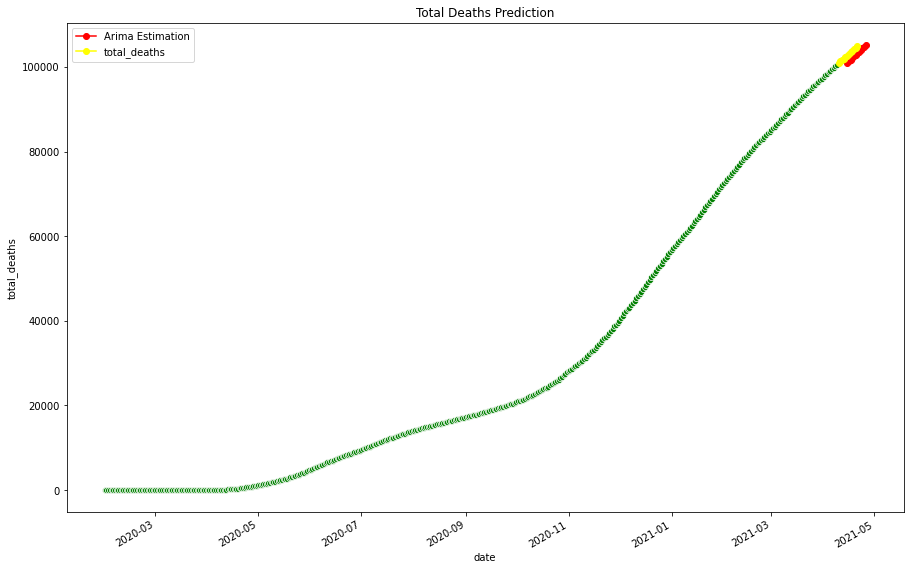

In [ ]:
warnings.filterwarnings('ignore')
# Running ARIMA model
model_arima = ARIMA(ru2, order=(0,2,2)) 
model_arima_fit = model_arima.fit(disp=-1)


fcast1 = model_arima_fit.forecast(12)[0]

fcast1 = (pd.Series(fcast1, index=two_weeks_forecast_dates)).astype(int)
fcast1 = fcast1.rename("Arima Estimation") 

fig, ax = plt.subplots(figsize=(15,10))
chart = sns.lineplot(x='date', y='total_deaths', data = ru2,color="green",marker="o")
chart.set_title('Total Deaths Prediction')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
ru_v2.plot(ax=ax, color='yellow', marker="o", legend=True)

#print(fcast1.values)

<AxesSubplot:title={'center':'Total Cases Prediction'}, xlabel='date', ylabel='total_cases'>

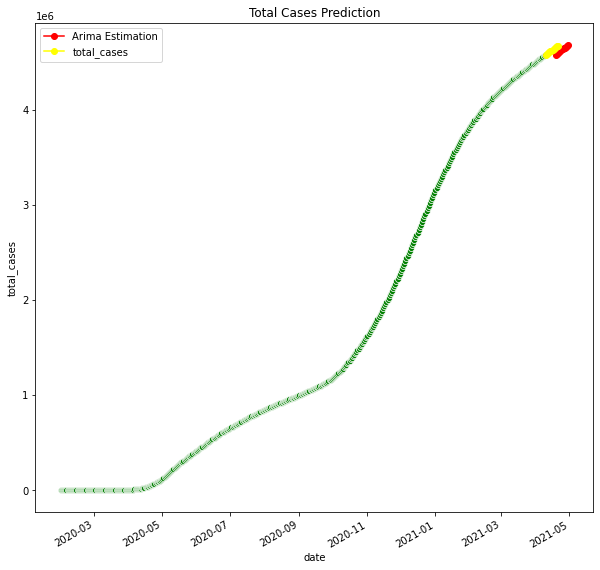

In [ ]:
ru = X_train1[X_train1['location'] == 'Russia']
ru2 = ru[['date', 'total_cases']]

ru_v = X_valid1[X_valid1['location'] == 'Russia']
ru_v2 = ru_v[['date', 'total_cases']]

ru2.set_index('date', inplace=True)
ru_v2.set_index('date', inplace=True)
df_train1 = pd.DataFrame(ru)
df_valid1 = pd.DataFrame(ru_v)
df_train1.set_index(df_train1['date'] , inplace=True)
df_valid1.set_index(df_valid1['date'], inplace=True)
df_train1['date'] = df_train1['date'].astype('datetime64')
df_valid1['date'] = df_valid1['date'].astype('datetime64')


two_weeks_forecast_dates = pd.date_range('2021-04-19', freq='D', periods = 12)
df_index_7_years = pd.DataFrame(two_weeks_forecast_dates)
df_index_7_years.columns = ['date']
df_index_7_years['date'] = pd.to_datetime(df_index_7_years['date'])
df_index_7_years['date']

warnings.filterwarnings('ignore')

# Running arima model
model_arima = ARIMA(ru2, order=(0,2,2))
model_arima_fit = model_arima.fit(disp=-1)


fcast1 = model_arima_fit.forecast(12)[0]


fcast1 = (pd.Series(fcast1, index=two_weeks_forecast_dates)).astype(int)
fcast1 = fcast1.rename("Arima Estimation") 


fig, ax = plt.subplots(figsize=(10,10))
chart = sns.lineplot(x='date', y='total_cases', data = ru2, color="green", marker="o")
chart.set_title('Total Cases Prediction')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
ru_v2.plot(ax=ax, color='yellow', marker="o", legend=True)

#print(fcast1.values)

In [ ]:
# Number of Vaccines perform in each country
countries = []
total_vaccines = []
df = pd.read_csv(r'C:\Users\Sai Saran\Downloads\Project datasets\Vaccination_dates.csv')    
df_vaccinated = df.groupby([df.location]).sum().sort_values(by='people_vaccinated',ascending=False)[:-1]
for item in df_vaccinated.iterrows():
    p = item[0]
    q = item[1]['people_vaccinated']
    countries.append(p)
    total_vaccines.append(q)
df_total_final = pd.DataFrame()
df_total_final['country'] = countries
df_total_final['total'] = total_vaccines
df_total_final

,country,total
0,USA,5826847142.00
1,India,2880112816.00
2,United Kingdom,1921249366.00
3,Brazil,710204516.00
4,Germany,583308302.00
...,...,...
172,Papua New Guinea,1331.00
173,South Sudan,947.00
174,Armenia,565.00
175,Tonga,500.00


In [ ]:
# create a date format
def format_time(d):
    dformat =  "%m/%d/%Y"
    d = datetime.strptime(d, dformat)
    return d
 
# returns number of days by making difference of two dates
def days_between(d1, d2):
    dformat =  '%Y-%m-%d'
    d1 = datetime.strptime(d1, dformat)
    d2 = datetime.strptime(d2, dformat)
    return abs((d2 - d1).days)

appended_country =[]
appended_vaccine_date=[]
appended_population = []
after_countries = []
after_days = []

# for loop to append the population
for item1 in df.iterrows():
    if (item1[1].location) not in appended_country:
        appended_vaccine_date.append(item1[1].date)
        appended_country.append(item1[1].location)
        appended_population.append(item1[1].population)
        
#for loop to count and update nu,ber of days left
for item2 in df_total_final.iterrows():
    for i in range(len(appended_country)):
        if appended_country[i].lower() ==  (item2[1].country).lower():
            p = format_time(str(appended_vaccine_date[i]))
            sdate = str(p).replace(' 00:00:00','')
            days = days_between(sdate, '2021-04-19')
            if int(item2[1]['total']) > 0:
                days_to_complete_vaccine = abs(((appended_population[i] - item2[1]['total'] ) * days) /  item2[1]['total'])
                if math.isnan(days_to_complete_vaccine) != True:
                    after_countries.append(appended_country[i])
                    after_days.append(int(days_to_complete_vaccine))
            
final_df = pd.DataFrame()
final_df['country'] = after_countries
final_df['days'] = after_days

fig = px.choropleth(
         final_df,
         locations='country', 
         color='country', 
         locationmode='country names', 
         hover_name='days'
)

fig.update_layout(
    title_text='Days to reach heard immunity',
    showlegend=False,
    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),

       font=dict(
           family='Arials',
           size=22, 
           color='black'
    )
)
fig.show()

final_df

,country,days
0,USA,113
1,India,48
2,United Kingdom,102
3,Brazil,64
4,Germany,96
...,...,...
171,Papua New Guinea,100815
172,South Sudan,47276
173,Armenia,99629
174,Tonga,631


<p style="font-family: Arials; font-size: 15px; color: 'Black">The above graph helps to understand how many days are left for every country to vaccinate everyone. The entities considered in this graph are:
<b> Vaccination rate, vaccinated population and total population in each country</b>.
</p>

<p style="font-family: Arials; font-size: 15px; color: 'Red">Thus from the above project following conclusions can be made:</p>
<ul style="font-family: Arials; font-size: 15px; color: 'Black">    
<li>The virus detection rate in few countries are very late and few countries like ISRAEL, JAPAN, KOREA, TAIWAN have started early in imposing lockdowns which directly helped in not transmiting the virus among their population. </li>
<li>Total 15 Vaccines are registered with WHO and few of them are approved for effective use thus after february 2021 vaccination has started giving hope to the people.</li>
<li>Wealthy countries like USA, UK, countries in European union have have secured millions of doses to their population which made lower economy countries not even able to secure doses to their frontline workers and senior citizens.</li>
<li>Deaths across the globe are very high at the beinging, mid and end of 2020 making Italy, newyork, wuhan, as epicenter cities and later at 2021 since the tight impostion of lockdown and  vaccine aganist the virus helped the death rate go down in most of the countries</li>
 <li> Forecasting the available data through machine learning models like <b>ARIMA</b> and <b>Linear Regression</b> we understand the deaths, infection rates are not trending down any time soon since few countries have stuck with second and third wave of coronavirus.</li>
<li>Countries across the globe should follow all the precautionary measures like following social distance, cleaning hands, wearing a mask, no social gatherings till the entire country get vacinated also refered as <b>'heard immunity'</b></li>
</ul>